This is really strange. If you look at the very last graph (error against beta), you see a strange arc at around beta=610.

Note: This version uses np.linalg.norm(psi_final - psi_correct), not (np.dot(psi_correct, psi_final))**2

In [217]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [218]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [219]:
Values = [10, 5]
Weights = [2, 3]
Ancil = [1, 2]

alpha = 1e3
# beta = 7.0
beta = 610
gamma = max(Values) + 1
T = 1
t_axis = np.arange(0, T, 0.01)

In [220]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

In [221]:
# H0 = np.zeros((2**(len(Values) + len(Ancil)), 2**(len(Values) + len(Ancil))))
H0 = np.kron(np.kron(np.kron(sigmaX, sigmaI), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaX), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaX), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaX)
# print(H0)

eigenvals_H0, eigenvecs_H0 = np.linalg.eigh(H0)
ground_idx_H0 = eigenvals_H0.argsort()[0]
print(eigenvals_H0[ground_idx_H0])
print(eigenvecs_H0[:, ground_idx_H0])

-4.000000000000003
[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]


In [222]:
Hp = (
    - (Values[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Values[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
    + gamma * (
        (Weights[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Weights[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
      - (Ancil[0] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaBin), sigmaI) + Ancil[1] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaBin))
    )**2
)
# print(Hp)

eigenvals_Hp, eigenvecs_Hp = np.linalg.eigh(Hp)
ground_idx_Hp = eigenvals_Hp.argsort()[0]
print(eigenvals_Hp[ground_idx_Hp])
print(eigenvecs_Hp[:, ground_idx_Hp])


-10.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [223]:
def H(t):
    return alpha * ( (1 - t/T)*beta*H0 + (t/T)*Hp )

# print(H(0))
# print(H(T))

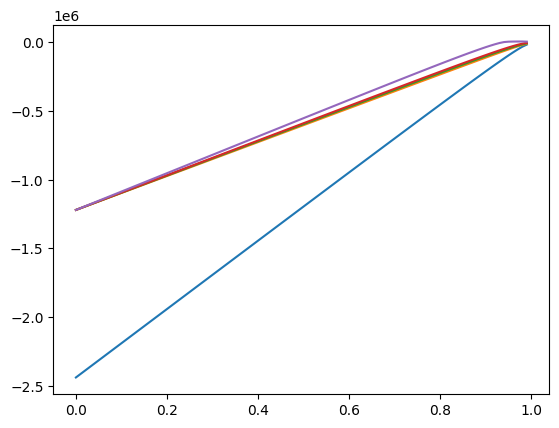

In [224]:
instant_eigenvals = []
for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)

In [225]:
int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)

In [226]:
U = expm(-1j * int_H_T)
# print(U.conjugate().transpose() @ U)

In [227]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
print(psi_ini)
print(np.linalg.norm(psi_ini))

[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]
1.0000000000000004


In [228]:
psi_final = U @ psi_ini
print(psi_final)
print(np.linalg.norm(psi_final))

[-0.255-0.029j  0.252+0.027j  0.258+0.033j -0.253-0.024j  0.242+0.015j
 -0.249-0.024j -0.246-0.023j  0.25 +0.027j  0.249+0.015j -0.257-0.027j
 -0.254-0.024j  0.26 +0.031j -0.229+0.007j  0.244+0.013j  0.235+0.005j
 -0.248-0.021j]
0.9999999999894827


In [229]:
psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
print(psi_correct)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [230]:
def int_H(t):
    return 0.5 * alpha * t / T * (2 * beta * H0*T + (-beta * H0 + Hp)*t )

def Unitary(t):
    return expm(-1j * int_H(t))

In [231]:
int_H(T) - int_H_T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [232]:
int_H(T)

array([[     0., 305000., 305000.,      0., 305000.,      0.,      0.,
             0., 305000.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.],
       [305000.,  22000.,      0., 305000.,      0., 305000.,      0.,
             0.,      0., 305000.,      0.,      0.,      0.,      0.,
             0.,      0.],
       [305000.,      0.,   5500., 305000.,      0.,      0., 305000.,
             0.,      0.,      0., 305000.,      0.,      0.,      0.,
             0.,      0.],
       [     0., 305000., 305000.,  49500.,      0.,      0.,      0.,
        305000.,      0.,      0.,      0., 305000.,      0.,      0.,
             0.,      0.],
       [305000.,      0.,      0.,      0.,  47000., 305000., 305000.,
             0.,      0.,      0.,      0.,      0., 305000.,      0.,
             0.,      0.],
       [     0., 305000.,      0.,      0., 305000.,   3000.,      0.,
        305000.,      0.,      0.,      0.,      0.,      0., 305000.,
             

In [233]:
H(T)

array([[     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.],
       [     0.,  44000.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.],
       [     0.,      0.,  11000.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.],
       [     0.,      0.,      0.,  99000.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.],
       [     0.,      0.,      0.,      0.,  94000.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.],
       [     0.,      0.,      0.,      0.,      0.,   6000.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             

In [234]:
Unitary(T)

array([[-0.398-0.268j,  0.034+0.059j,  0.045+0.067j, -0.011-0.072j,
         0.157+0.142j, -0.126+0.018j,  0.3  -0.051j,  0.216-0.014j,
        -0.131+0.141j, -0.172+0.341j,  0.202+0.337j, -0.073-0.034j,
        -0.086-0.061j,  0.022+0.061j,  0.061+0.095j, -0.397+0.156j],
       [ 0.034+0.059j, -0.282+0.296j, -0.009-0.032j,  0.082-0.269j,
        -0.26 -0.169j,  0.048+0.093j,  0.046+0.057j,  0.039+0.018j,
        -0.153-0.07j ,  0.037+0.052j,  0.043+0.031j, -0.009-0.03j ,
        -0.009+0.396j, -0.259-0.171j,  0.255+0.524j,  0.051+0.055j],
       [ 0.045+0.067j, -0.009-0.032j,  0.145-0.152j,  0.071-0.15j ,
        -0.185-0.082j,  0.162-0.005j,  0.197+0.151j, -0.003+0.002j,
         0.143+0.214j, -0.074-0.032j, -0.076+0.124j, -0.583+0.313j,
         0.002+0.297j,  0.068+0.267j, -0.261-0.156j,  0.018+0.054j],
       [-0.011-0.072j,  0.082-0.269j,  0.071-0.15j , -0.249+0.401j,
         0.008+0.261j,  0.018-0.033j, -0.081-0.105j,  0.036-0.106j,
         0.059+0.224j, -0.011-0.07j , -0.098-

In [235]:
Unitary(T).conjugate().transpose() @ Unitary(T)

array([[ 1.-0.j,  0.+0.j, -0.+0.j, -0.+0.j,  0.-0.j,  0.+0.j,  0.-0.j,
         0.-0.j, -0.+0.j,  0.-0.j,  0.+0.j, -0.+0.j, -0.-0.j,  0.+0.j,
        -0.-0.j, -0.+0.j],
       [ 0.-0.j,  1.+0.j, -0.+0.j, -0.-0.j,  0.+0.j,  0.+0.j, -0.+0.j,
        -0.-0.j,  0.+0.j,  0.-0.j, -0.-0.j, -0.-0.j,  0.+0.j,  0.-0.j,
        -0.-0.j, -0.+0.j],
       [-0.-0.j, -0.-0.j,  1.+0.j,  0.-0.j,  0.+0.j,  0.-0.j, -0.-0.j,
        -0.-0.j,  0.-0.j, -0.-0.j, -0.+0.j,  0.+0.j,  0.+0.j, -0.+0.j,
         0.+0.j,  0.+0.j],
       [-0.-0.j, -0.+0.j,  0.+0.j,  1.+0.j, -0.-0.j, -0.-0.j, -0.+0.j,
         0.+0.j, -0.-0.j, -0.-0.j, -0.-0.j,  0.+0.j,  0.-0.j, -0.+0.j,
        -0.-0.j, -0.+0.j],
       [ 0.+0.j,  0.-0.j,  0.-0.j, -0.+0.j,  1.+0.j, -0.+0.j, -0.-0.j,
         0.+0.j, -0.+0.j,  0.-0.j,  0.-0.j, -0.+0.j, -0.-0.j,  0.-0.j,
        -0.+0.j, -0.+0.j],
       [ 0.-0.j,  0.-0.j,  0.+0.j, -0.+0.j, -0.-0.j,  1.+0.j,  0.+0.j,
        -0.-0.j,  0.-0.j,  0.-0.j, -0.-0.j,  0.+0.j, -0.-0.j, -0.-0.j,
        -0.+0

In [244]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
# print(psi_correct)

# psi_t_list = []
energy_expectation_t_list = []
psi_t_list = []

for t in t_axis:
    psi_t = Unitary(t) @ psi_ini
    # print(psi_t)
    # print(np.linalg.norm(psi_t))
    energy_expectation_t_list.append(psi_t.conjugate().transpose() @ H(t) @ psi_t)
    psi_t_list.append(psi_t)

print(energy_expectation_t_list)
for psi_t in psi_t_list:
    print(psi_t, sep="\n")

[np.complex128(-3996000.000000003+0j), np.complex128(-3955510.139464443-1.1641532182693481e-10j), np.complex128(-3915020.3970148955+0j), np.complex128(-3874531.3115473916-1.4551915228366852e-11j), np.complex128(-3834041.5405317256-5.820766091346741e-11j), np.complex128(-3793551.8584056953+0j), np.complex128(-3753063.331877252-1.1641532182693481e-10j), np.complex128(-3712576.1969438633-2.9103830456733704e-11j), np.complex128(-3672089.782486867+1.1641532182693481e-10j), np.complex128(-3631597.3666586094-2.3283064365386963e-10j), np.complex128(-3591109.89022871+0j), np.complex128(-3550622.1532596895+1.4551915228366852e-11j), np.complex128(-3510135.9830731316+0j), np.complex128(-3469658.501666351+1.1641532182693481e-10j), np.complex128(-3429159.575145767+5.820766091346741e-11j), np.complex128(-3388674.503529328-2.9103830456733704e-11j), np.complex128(-3348163.7223497597+0j), np.complex128(-3307715.293558741-2.3283064365386963e-10j), np.complex128(-3267209.488146283+1.1641532182693481e-10j)

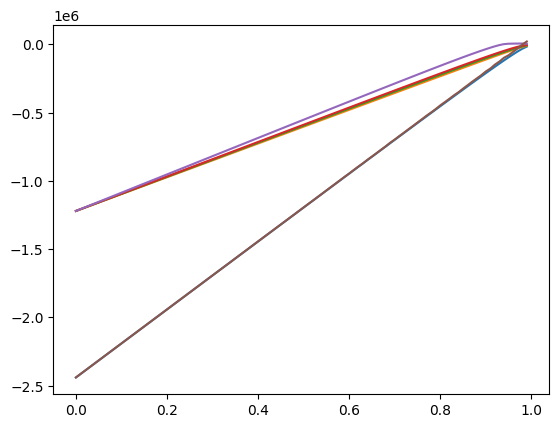

In [ ]:
instant_eigenvals = []
instant_eigenvecs = []
for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)
plt.plot(t_axis, energy_expectation_t_list)

In [238]:
error_list = []
beta_list = np.arange(0, 1000, 1)

for beta in beta_list:
    int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)
    U = expm(-1j * int_H_T)

    psi_final = U @ psi_ini
    print(psi_final)
    print(psi_final.conjugate().transpose() @ psi_final)
    error = np.linalg.norm(psi_final - psi_correct)
    print(error)
    error_list.append(error)
    
error_list = np.array(error_list)

[ 0.25 +0.j     0.21 +0.136j  0.15 +0.2j    0.121-0.219j  0.05 +0.245j
 -0.244-0.055j -0.248+0.033j -0.19 +0.163j  0.166-0.187j  0.039-0.247j
 -0.221+0.117j  0.221-0.117j  0.156-0.195j  0.25 -0.012j -0.246-0.042j
 -0.005+0.25j ]
(1.0000000000000009+0j)
1.3866022489919836
[ 0.336-0.318j  0.121+0.2j    0.191+0.017j  0.192-0.143j -0.248+0.004j
 -0.122+0.182j  0.215-0.101j -0.29 +0.044j -0.116-0.2j    0.135+0.264j
  0.003-0.081j  0.025+0.027j  0.034-0.24j   0.162+0.166j -0.22 -0.119j
  0.169+0.178j]
(0.9999999999999235+0j)
1.3150223018830784
[ 0.101+0.23j  -0.173+0.136j -0.193-0.131j  0.189+0.131j -0.113+0.189j
 -0.18 +0.111j -0.163+0.164j  0.137+0.337j -0.117+0.175j  0.084-0.36j
 -0.006+0.273j -0.01 -0.157j -0.231-0.011j -0.232-0.051j -0.034-0.247j
  0.195-0.103j]
(1.0000000000006848+0j)
1.3531705558576692
[ 0.008+0.232j  0.089-0.17j   0.02 -0.258j -0.179+0.152j -0.075-0.231j
  0.241+0.072j  0.232+0.054j -0.109-0.253j -0.193-0.017j  0.243-0.4j
 -0.052+0.203j -0.012-0.062j  0.202+0.105j  0

Text(0, 0.5, 'error')

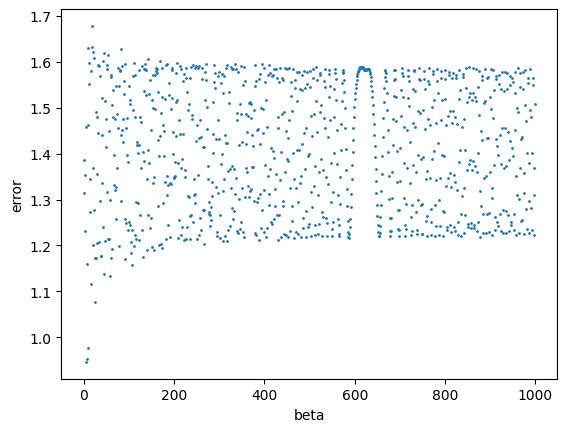

In [239]:
plt.scatter(beta_list, error_list, s=1)
plt.xlabel("beta")
plt.ylabel("error")

In [240]:
min(error_list)

np.float64(0.945949841801286)

In [241]:
beta_list[error_list.argmin()]

np.int64(4)